Epoch 1/20
1875/1875 [==============================] - 11s 5ms/step - loss: 0.0496 - accuracy: 0.1275 - val_loss: 0.0458 - val_accuracy: 0.1469
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0444 - accuracy: 0.1560 - val_loss: 0.0432 - val_accuracy: 0.1637
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0425 - accuracy: 0.1677 - val_loss: 0.0420 - val_accuracy: 0.1680
Epoch 4/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0413 - accuracy: 0.1752 - val_loss: 0.0404 - val_accuracy: 0.1736
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0403 - accuracy: 0.1795 - val_loss: 0.0401 - val_accuracy: 0.1762
Epoch 6/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0396 - accuracy: 0.1824 - val_loss: 0.0393 - val_accuracy: 0.1814
Epoch 7/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0390 - accuracy: 0.1850 - val_loss: 0.0389 - val_acc

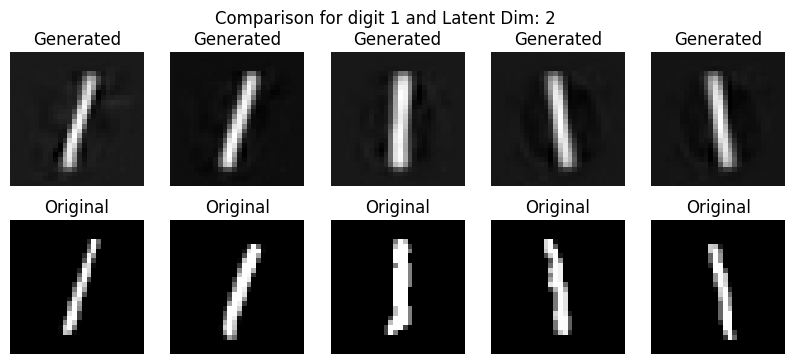

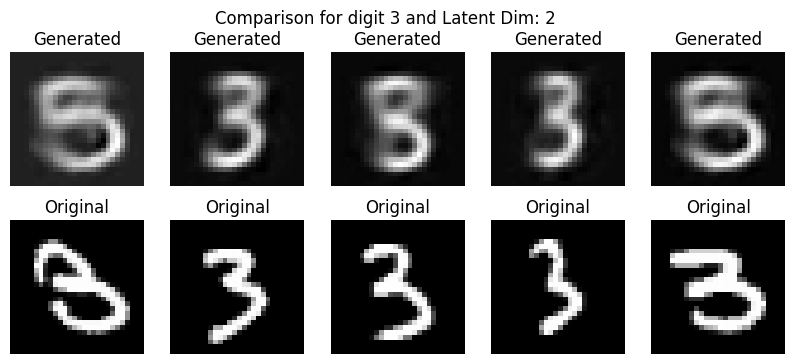

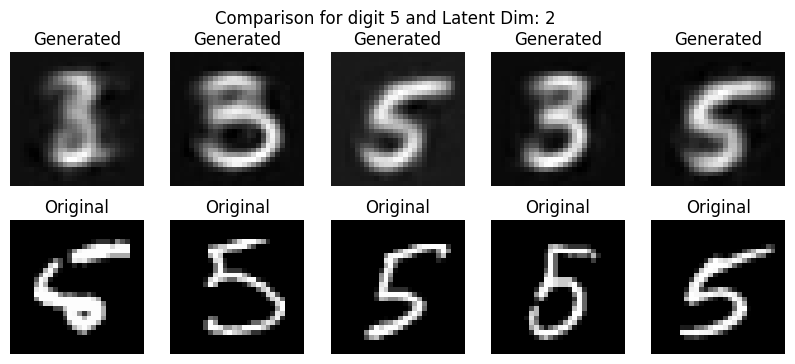

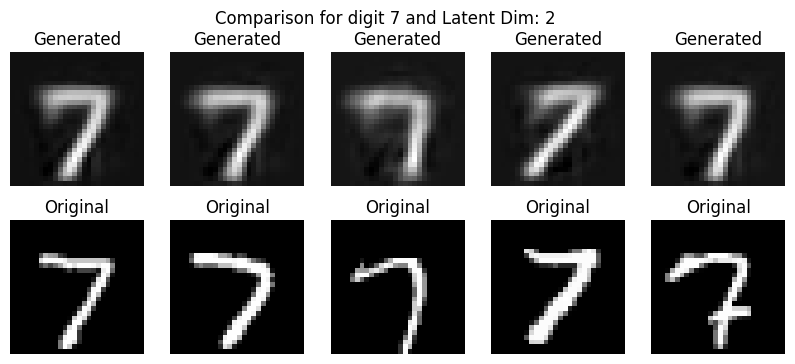

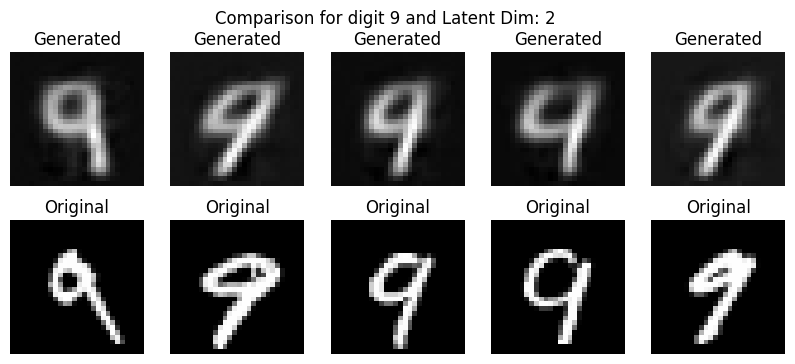

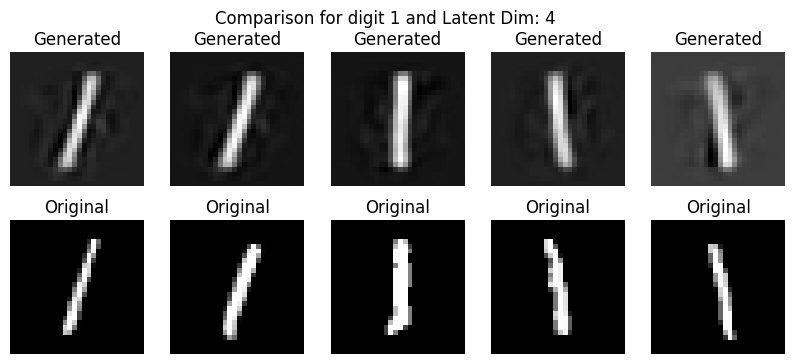

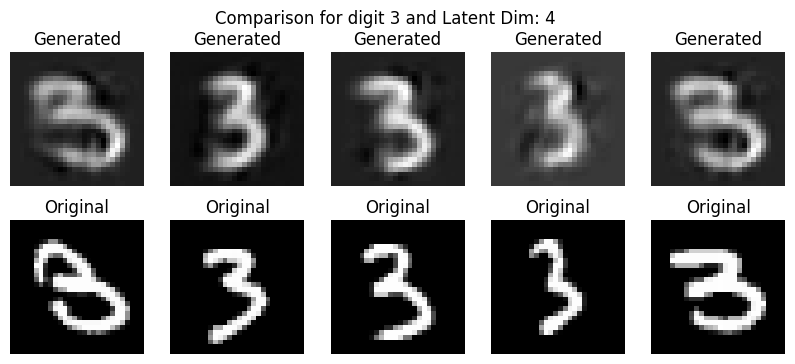

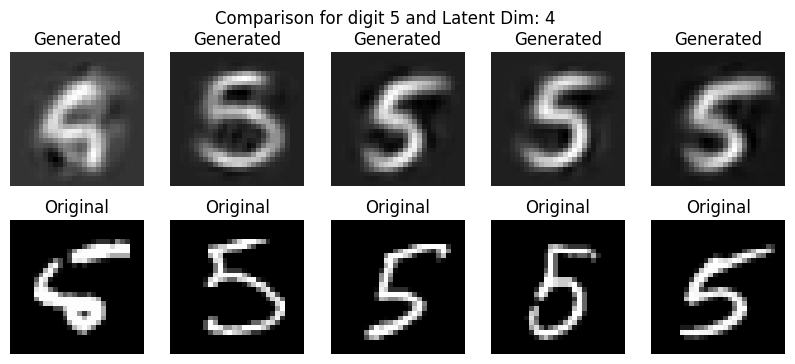

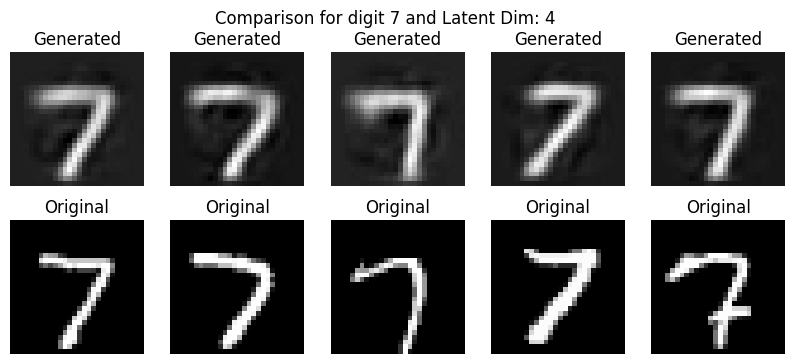

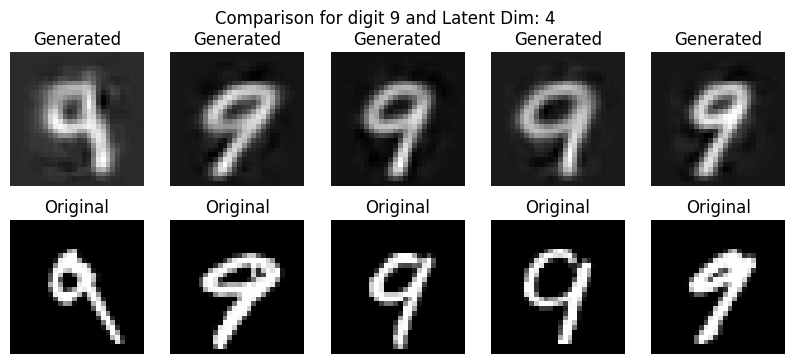

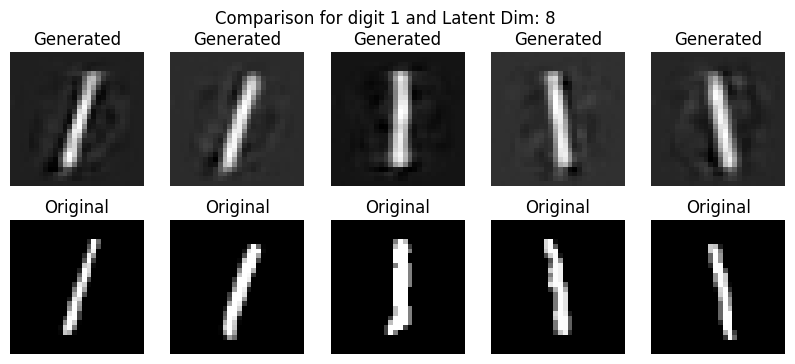

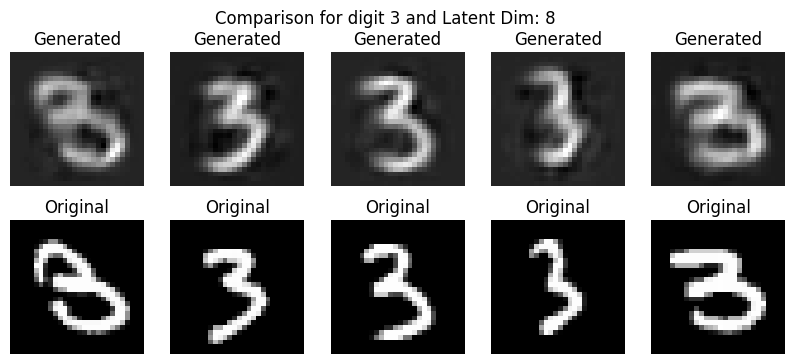

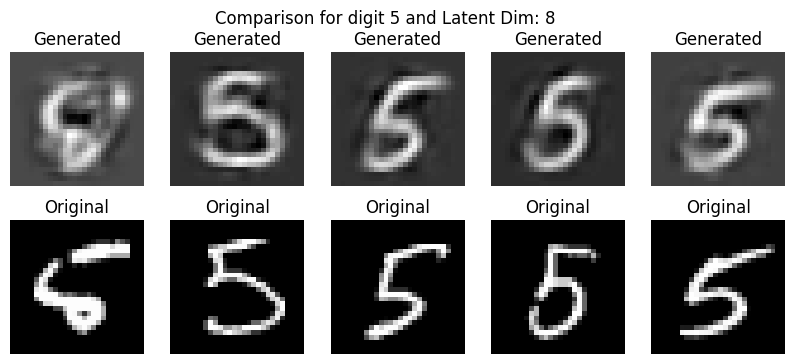

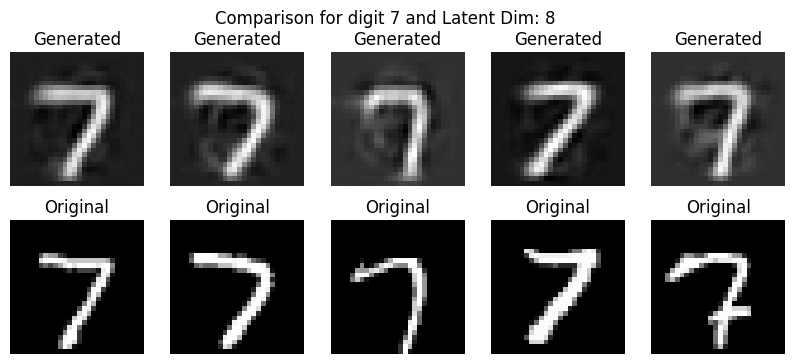

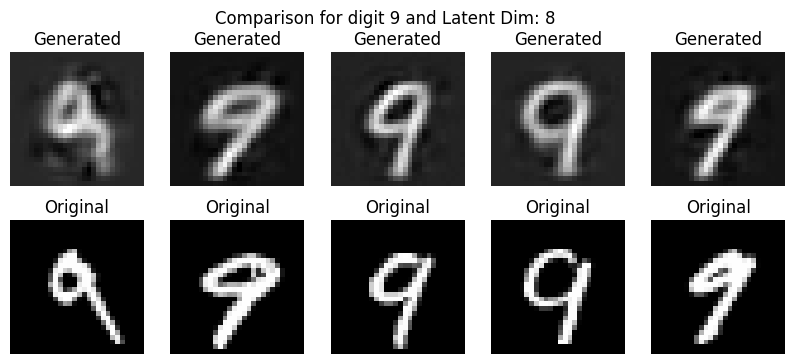

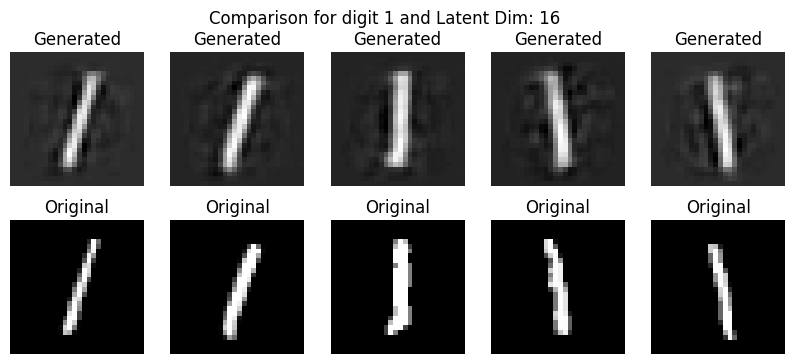

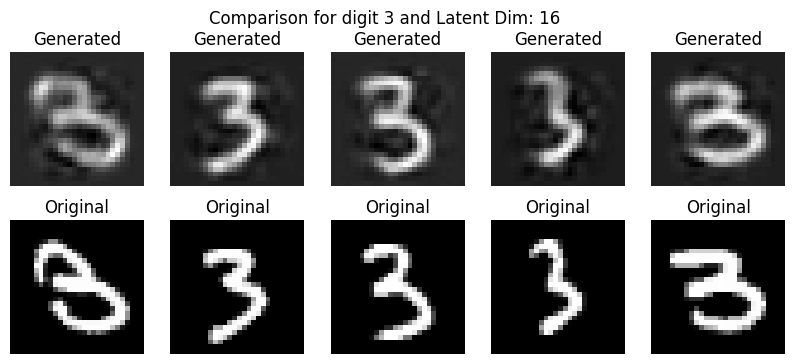

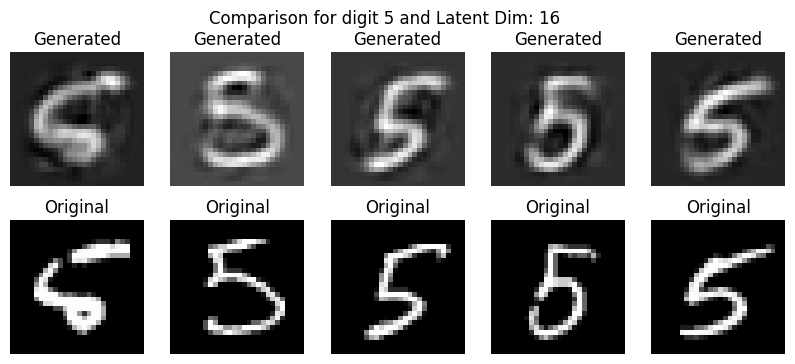

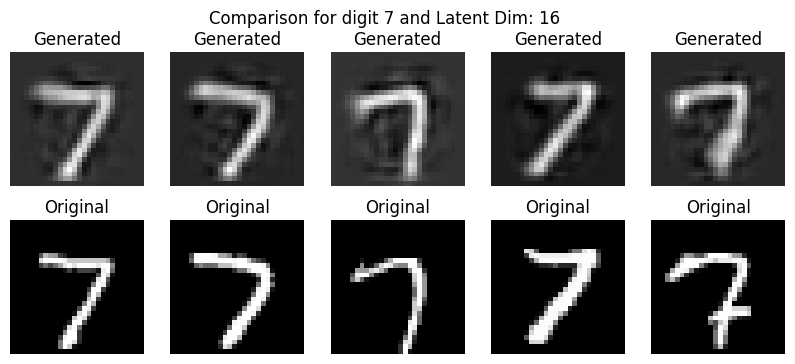

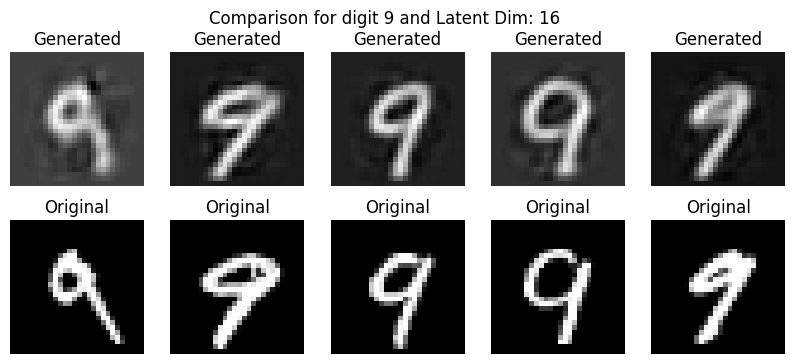

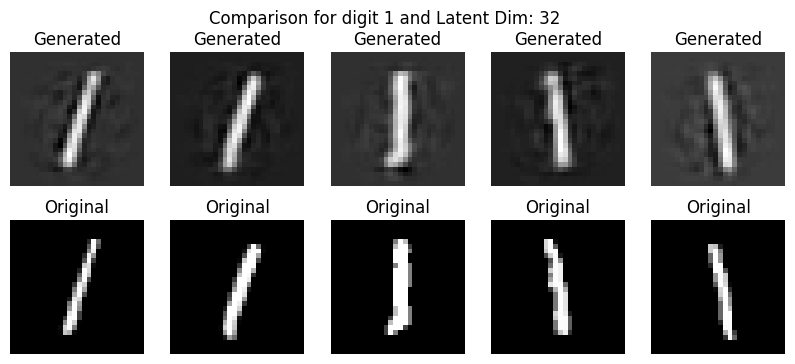

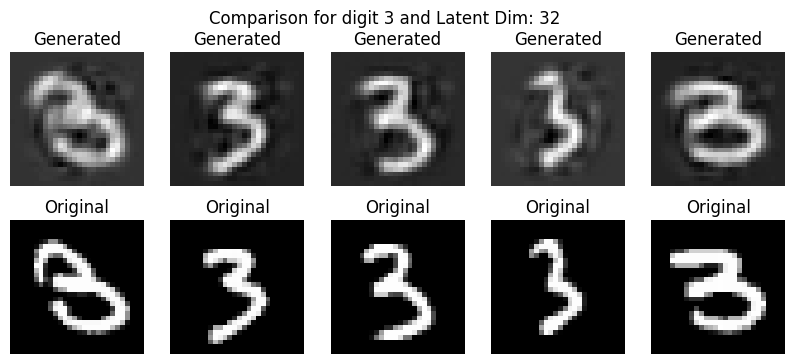

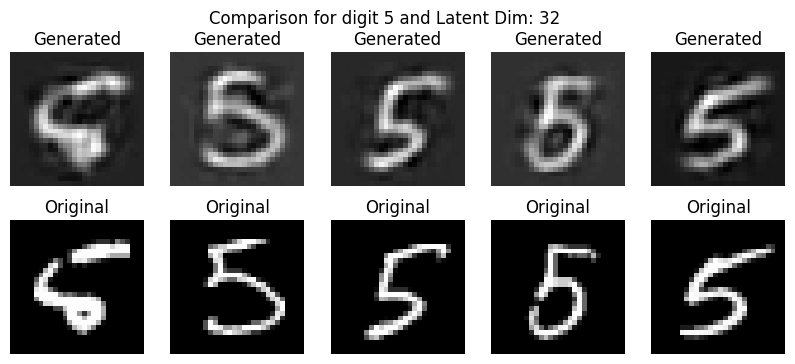

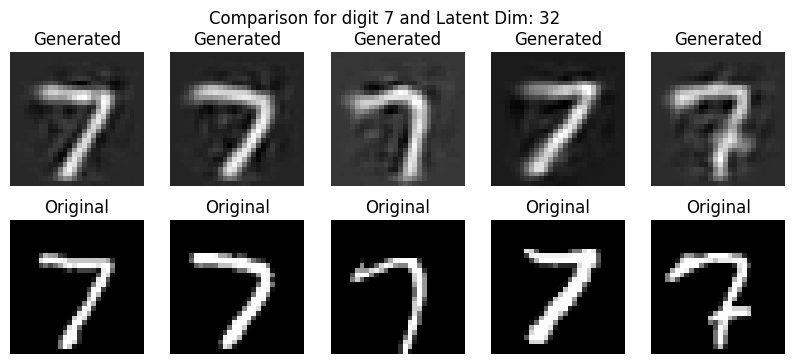

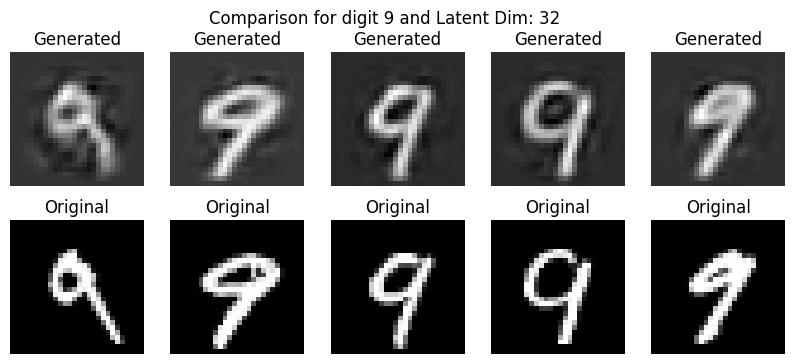

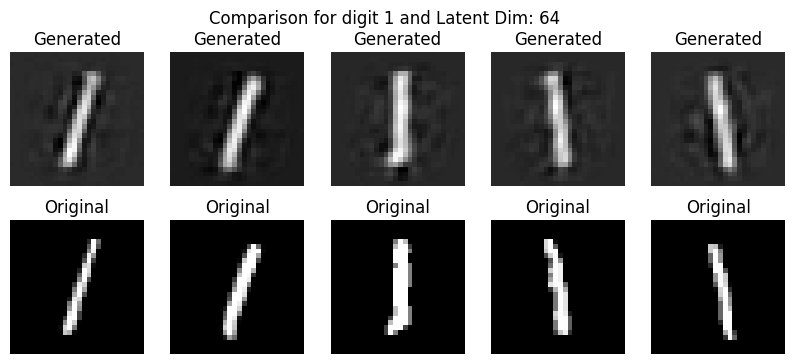

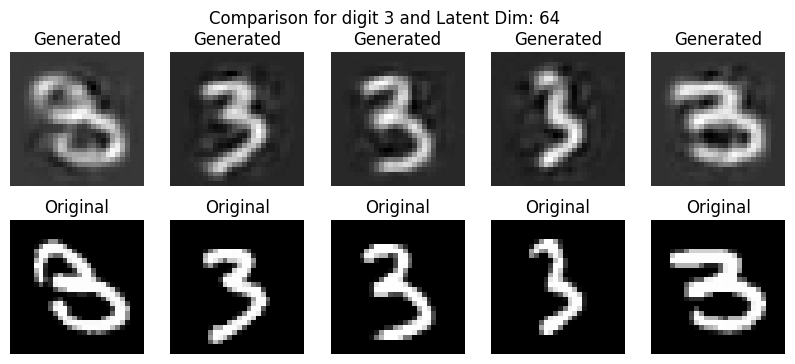

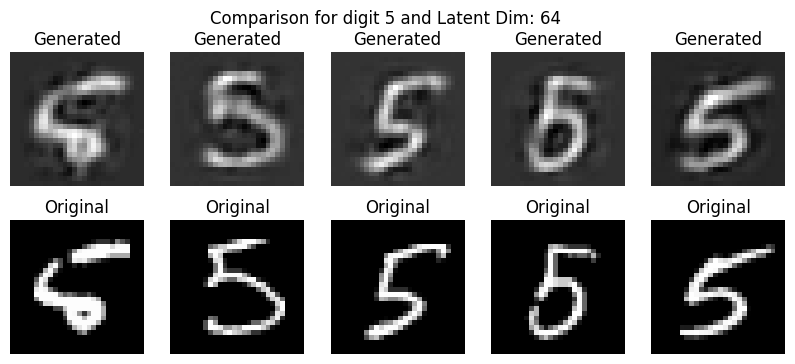

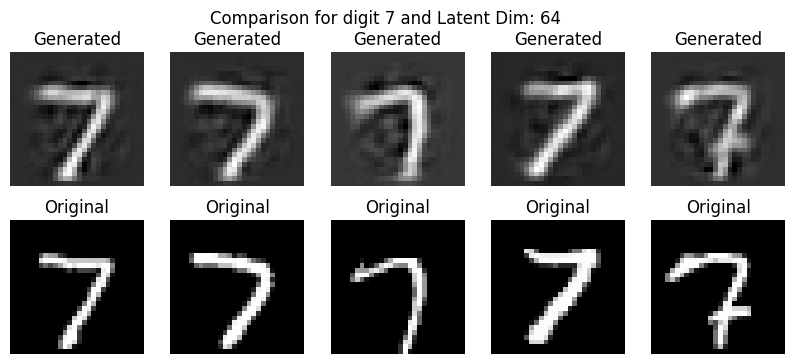

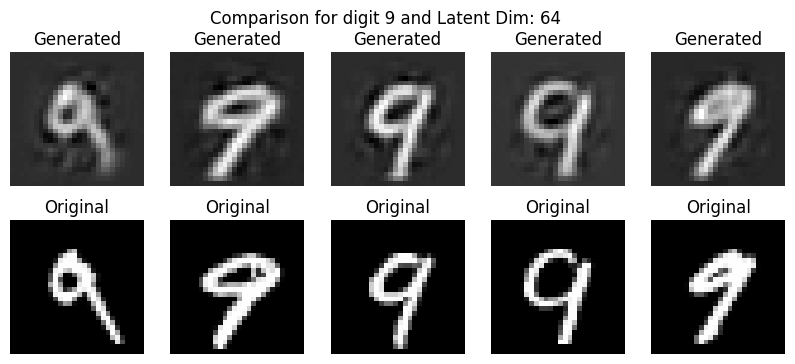

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Data Preprocessing
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Digits to reconstruct
digits_to_reconstruct = [1, 3, 5, 7, 9]

# Model Architecture
def build_diffusion_model(latent_dim):
    model = models.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(latent_dim),
        layers.Dense(64, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(28 * 28),
        layers.Reshape((28, 28))
    ])
    return model

latent_dims = [2,4,8,16,32,64]
reconstructed_images_all = []

# Training and Reconstruction
for latent_dim in latent_dims:
    model = build_diffusion_model(latent_dim)

    # Compile the model
    model.compile(optimizer='adam',
                  loss='mean_squared_error',
                  metrics=['accuracy'])

    # Train the model
    model.fit(x_train, x_train, epochs=20, batch_size=32, validation_data=(x_test, x_test))

    # Reconstruction of digits
    reconstructed_images = []
    for digit in digits_to_reconstruct:
        digit_indices = np.where(y_test == digit)[0]
        digit_images = x_test[digit_indices][:5]  # Select 5 images of the digit
        reconstructed_digit_images = model.predict(digit_images)
        reconstructed_images.append(reconstructed_digit_images)

    reconstructed_images_all.append(reconstructed_images)

# Visualization
for latent_dim_index, latent_dim in enumerate(latent_dims):
    for digit_index, digit in enumerate(digits_to_reconstruct):
        plt.figure(figsize=(10, 4))
        for i in range(5):
            plt.subplot(2, 5, i + 1)
            plt.imshow(reconstructed_images_all[latent_dim_index][digit_index][i], cmap='gray')
            plt.title("Generated")
            plt.axis('off')
            plt.subplot(2, 5, i + 6)
            original_image = x_test[y_test == digit][i]
            plt.imshow(original_image, cmap='gray')
            plt.title("Original")
            plt.axis('off')
        plt.suptitle(f"Comparison for digit {digit} and Latent Dim: {latent_dim}")
        plt.show()



11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/10
241/241 [==============================] - 53s 204ms/step - loss: 0.0712 - val_loss: 0.0430
Epoch 2/10
241/241 [==============================] - 31s 127ms/step - loss: 0.0392 - val_loss: 0.0361
Epoch 3/10
241/241 [==============================] - 30s 127ms/step - loss: 0.0358 - val_loss: 0.0348
Epoch 4/10
241/241 [==============================] - 30s 125ms/step - loss: 0.0346 - val_loss: 0.0338
Epoch 5/10
241/241 [==============================] - 30s 125ms/step - loss: 0.0336 - val_loss: 0.0328
Epoch 6/10
241/241 [==============================] - 31s 129ms/step - loss: 0.0328 - val_loss: 0.0322
Epoch 7/10
241/241 [==============================] - 31s 130ms/step - loss: 0.0322 - val_loss: 0.0319
Epoch 8/10
241/241 [==============================] - 31s 129ms/step - loss: 0.0317 - val_loss: 0.0316
Epoch 9/10
241/241 [==============================] - 31s 128ms/step - loss: 0.0312 - val_loss: 0.0312
Epoch 10

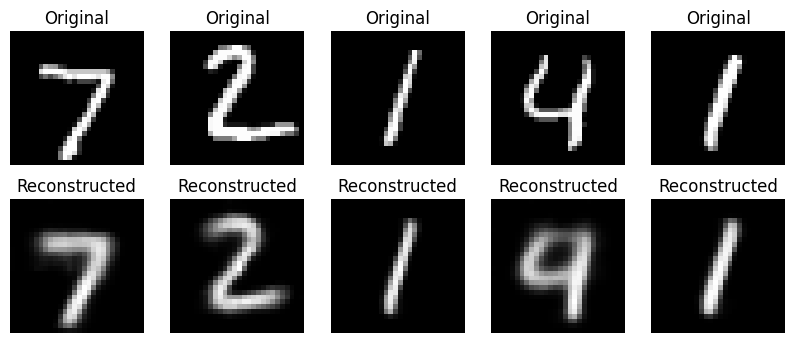

Epoch 1/10
241/241 [==============================] - 33s 128ms/step - loss: 0.0625 - val_loss: 0.0337
Epoch 2/10
241/241 [==============================] - 30s 125ms/step - loss: 0.0292 - val_loss: 0.0261
Epoch 3/10
241/241 [==============================] - 30s 125ms/step - loss: 0.0252 - val_loss: 0.0240
Epoch 4/10
241/241 [==============================] - 30s 126ms/step - loss: 0.0237 - val_loss: 0.0229
Epoch 5/10
241/241 [==============================] - 33s 139ms/step - loss: 0.0228 - val_loss: 0.0223
Epoch 6/10
241/241 [==============================] - 31s 128ms/step - loss: 0.0222 - val_loss: 0.0219
Epoch 7/10
241/241 [==============================] - 32s 132ms/step - loss: 0.0218 - val_loss: 0.0215
Epoch 8/10
241/241 [==============================] - 31s 129ms/step - loss: 0.0214 - val_loss: 0.0214
Epoch 9/10
241/241 [==============================] - 31s 129ms/step - loss: 0.0212 - val_loss: 0.0212
Epoch 10/10
163/163 [==============================] - 3s 15ms/step
Laten

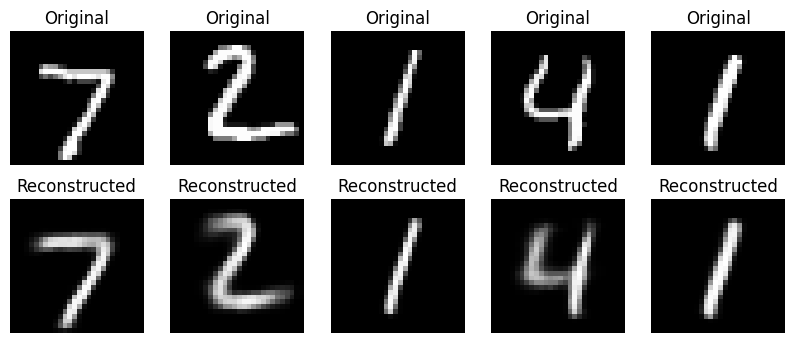

Epoch 1/10
241/241 [==============================] - 32s 127ms/step - loss: 0.0599 - val_loss: 0.0320
Epoch 2/10
241/241 [==============================] - 31s 127ms/step - loss: 0.0235 - val_loss: 0.0186
Epoch 3/10
241/241 [==============================] - 31s 127ms/step - loss: 0.0174 - val_loss: 0.0158
Epoch 4/10
241/241 [==============================] - 32s 132ms/step - loss: 0.0154 - val_loss: 0.0144
Epoch 5/10
241/241 [==============================] - 30s 126ms/step - loss: 0.0143 - val_loss: 0.0141
Epoch 6/10
241/241 [==============================] - 31s 128ms/step - loss: 0.0135 - val_loss: 0.0136
Epoch 7/10
241/241 [==============================] - 31s 128ms/step - loss: 0.0131 - val_loss: 0.0131
Epoch 8/10
241/241 [==============================] - 30s 127ms/step - loss: 0.0126 - val_loss: 0.0126
Epoch 9/10
241/241 [==============================] - 31s 128ms/step - loss: 0.0123 - val_loss: 0.0123
Epoch 10/10
163/163 [==============================] - 2s 12ms/step
Laten

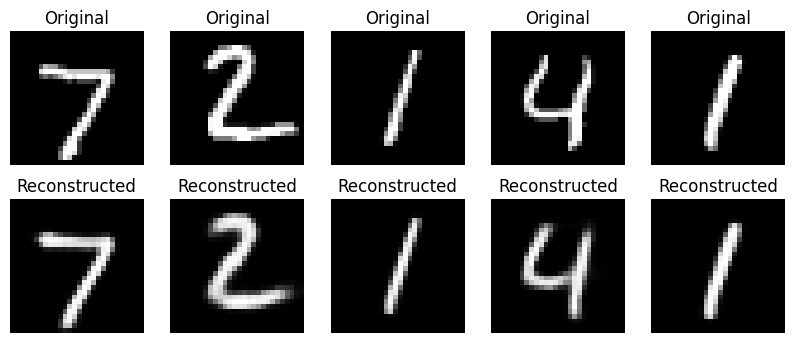

Epoch 1/10
241/241 [==============================] - 33s 130ms/step - loss: 0.0604 - val_loss: 0.0302
Epoch 2/10
241/241 [==============================] - 31s 128ms/step - loss: 0.0221 - val_loss: 0.0163
Epoch 3/10
241/241 [==============================] - 31s 127ms/step - loss: 0.0147 - val_loss: 0.0129
Epoch 4/10
241/241 [==============================] - 30s 124ms/step - loss: 0.0119 - val_loss: 0.0109
Epoch 5/10
241/241 [==============================] - 30s 125ms/step - loss: 0.0103 - val_loss: 0.0098
Epoch 6/10
241/241 [==============================] - 31s 127ms/step - loss: 0.0092 - val_loss: 0.0087
Epoch 7/10
241/241 [==============================] - 31s 130ms/step - loss: 0.0084 - val_loss: 0.0086
Epoch 8/10
241/241 [==============================] - 31s 127ms/step - loss: 0.0079 - val_loss: 0.0077
Epoch 9/10
241/241 [==============================] - 30s 126ms/step - loss: 0.0075 - val_loss: 0.0075
Epoch 10/10
163/163 [==============================] - 2s 12ms/step
Laten

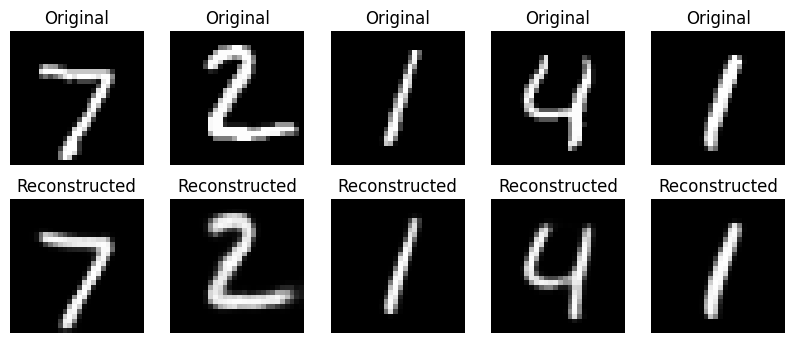

Epoch 1/10
241/241 [==============================] - 33s 130ms/step - loss: 0.0626 - val_loss: 0.0313
Epoch 2/10
241/241 [==============================] - 32s 132ms/step - loss: 0.0226 - val_loss: 0.0171
Epoch 3/10
241/241 [==============================] - 31s 129ms/step - loss: 0.0147 - val_loss: 0.0120
Epoch 4/10
241/241 [==============================] - 33s 135ms/step - loss: 0.0110 - val_loss: 0.0098
Epoch 5/10
241/241 [==============================] - 31s 130ms/step - loss: 0.0090 - val_loss: 0.0084
Epoch 6/10
241/241 [==============================] - 31s 129ms/step - loss: 0.0079 - val_loss: 0.0076
Epoch 7/10
241/241 [==============================] - 31s 129ms/step - loss: 0.0072 - val_loss: 0.0068
Epoch 8/10
241/241 [==============================] - 31s 129ms/step - loss: 0.0066 - val_loss: 0.0065
Epoch 9/10
241/241 [==============================] - 31s 129ms/step - loss: 0.0062 - val_loss: 0.0062
Epoch 10/10
163/163 [==============================] - 2s 12ms/step
Laten

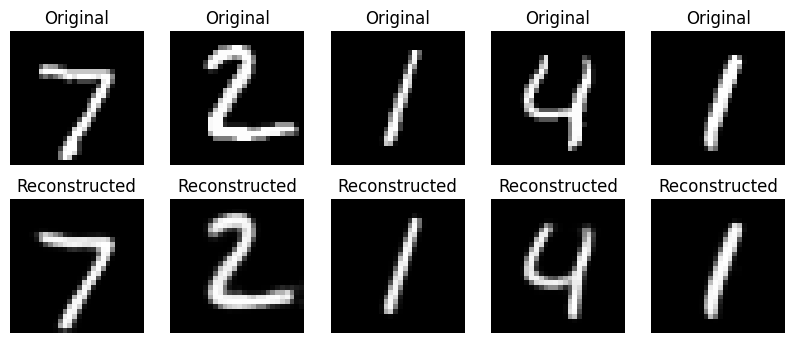

Epoch 1/10
241/241 [==============================] - 33s 131ms/step - loss: 0.0627 - val_loss: 0.0378
Epoch 2/10
241/241 [==============================] - 31s 128ms/step - loss: 0.0275 - val_loss: 0.0211
Epoch 3/10
241/241 [==============================] - 31s 129ms/step - loss: 0.0168 - val_loss: 0.0138
Epoch 4/10
241/241 [==============================] - 31s 129ms/step - loss: 0.0124 - val_loss: 0.0111
Epoch 5/10
241/241 [==============================] - 30s 126ms/step - loss: 0.0103 - val_loss: 0.0097
Epoch 6/10
152/241 [=================>............] - ETA: 10s - loss: 0.0093

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Filter digits 1, 4, 2, 7, 9
train_mask = np.isin(y_train, [1, 4, 2, 7, 9])
test_mask = np.isin(y_test, [1, 4, 2, 7, 9])
x_train = x_train[train_mask]
x_test = x_test[test_mask]
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Define the VAE architecture
def encoder_model(latent_dim):
    inputs = keras.Input(shape=(28, 28, 1))
    x = layers.Conv2D(32, 3, activation='relu', strides=2, padding='same')(inputs)
    x = layers.Conv2D(64, 3, activation='relu', strides=2, padding='same')(x)
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(64, activation='relu')(x)
    z_mean = layers.Dense(latent_dim, name='z_mean')(x)
    z_log_var = layers.Dense(latent_dim, name='z_log_var')(x)
    return keras.Model(inputs, [z_mean, z_log_var], name='encoder')

def decoder_model(latent_dim):
    latent_inputs = keras.Input(shape=(latent_dim,))
    x = layers.Dense(64, activation='relu')(latent_inputs)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(7 * 7 * 64, activation='relu')(x)
    x = layers.Reshape((7, 7, 64))(x)
    x = layers.Conv2DTranspose(64, 3, activation='relu', strides=2, padding='same')(x)
    x = layers.Conv2DTranspose(32, 3, activation='relu', strides=2, padding='same')(x)
    outputs = layers.Conv2DTranspose(1, 3, activation='sigmoid', padding='same')(x)
    return keras.Model(latent_inputs, outputs, name='decoder')

# Define the VAE model
def vae_model(encoder, decoder, latent_dim):
    inputs = keras.Input(shape=(28, 28, 1))
    z_mean, z_log_var = encoder(inputs)
    z = layers.Lambda(sampling)([z_mean, z_log_var])
    reconstructed = decoder(z)
    vae = keras.Model(inputs, reconstructed, name='vae')
    return vae

# Sampling function
def sampling(args):
    z_mean, z_log_var = args
    epsilon = tf.random.normal(shape=(tf.shape(z_mean)[0], latent_dim), mean=0., stddev=1.)
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

# Define lists to store latent dimensions and corresponding MSE values
latent_dims = [2, 4, 8, 16, 32, 64]
mse_values = []

# Train and evaluate VAE models
for latent_dim in latent_dims:
    encoder = encoder_model(latent_dim)
    decoder = decoder_model(latent_dim)
    vae = vae_model(encoder, decoder, latent_dim)
    vae.compile(optimizer='adam', loss='mse')
    vae.fit(x_train, x_train, epochs=10, batch_size=128, validation_data=(x_test, x_test))

    # Reconstruction and MSE calculation
    reconstructed_images = vae.predict(x_test)
    mse = np.mean(np.square(x_test - reconstructed_images))
    print(f"Latent dimension: {latent_dim}, MSE: {mse}")
    mse_values.append(mse)

    # Display original and reconstructed images
    num_images = 5
    plt.figure(figsize=(10, 4))
    for i in range(num_images):
        # Original images
        plt.subplot(2, num_images, i + 1)
        plt.imshow(x_test[i].squeeze(), cmap='gray')
        plt.title("Original")
        plt.axis('off')

        # Reconstructed images
        plt.subplot(2, num_images, i + 1 + num_images)
        plt.imshow(reconstructed_images[i].squeeze(), cmap='gray')
        plt.title("Reconstructed")
        plt.axis('off')
    plt.show()

plt.figure(figsize=(8, 6))
plt.plot(latent_dims, mse_values, marker='o')
plt.title('Mean Squared Error vs. Latent Variable Dimension')
plt.xlabel('Latent Variable Dimension')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

1/1 [==============================] - 0s 61ms/step


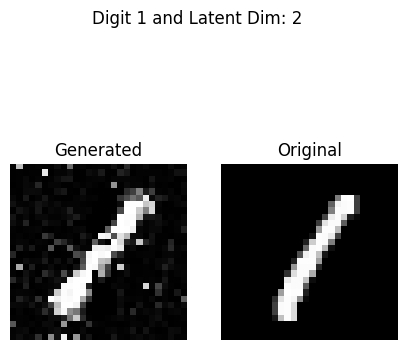

1/1 [==============================] - 0s 59ms/step


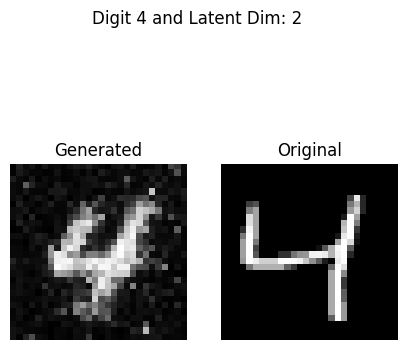

1/1 [==============================] - 0s 62ms/step


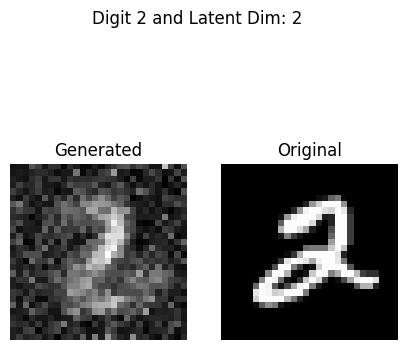

1/1 [==============================] - 0s 69ms/step


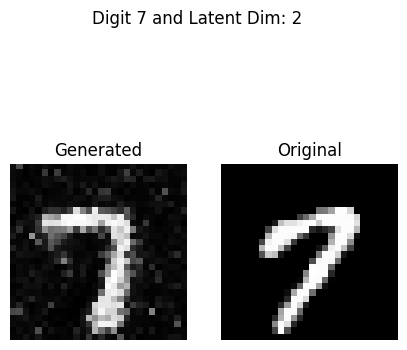

1/1 [==============================] - 0s 68ms/step


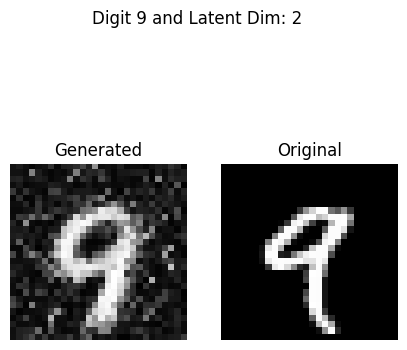

1/1 [==============================] - 0s 52ms/step


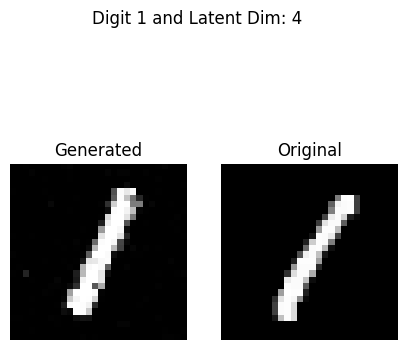

1/1 [==============================] - 0s 63ms/step


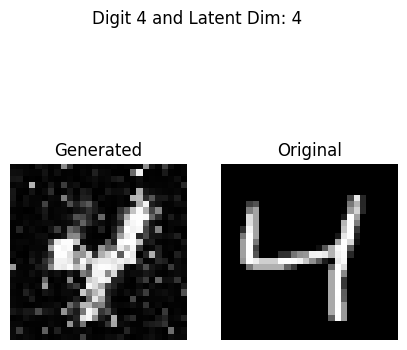

1/1 [==============================] - 0s 62ms/step


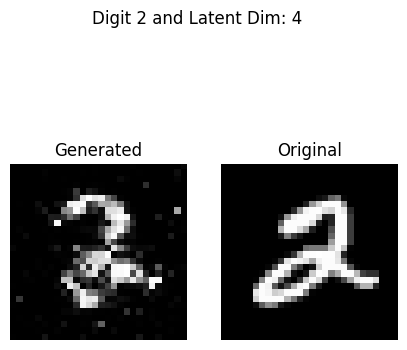

1/1 [==============================] - 0s 70ms/step


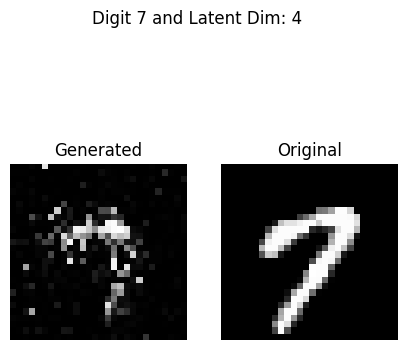

1/1 [==============================] - 0s 59ms/step


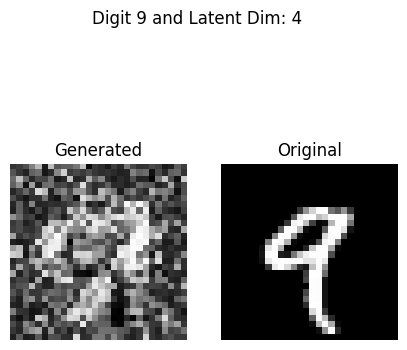

1/1 [==============================] - 0s 63ms/step


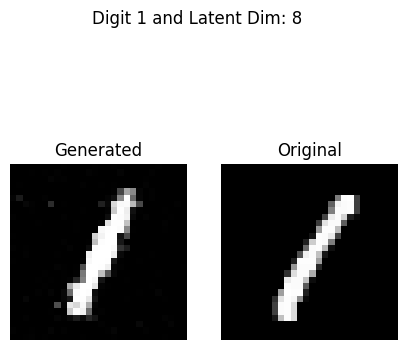

1/1 [==============================] - 0s 67ms/step


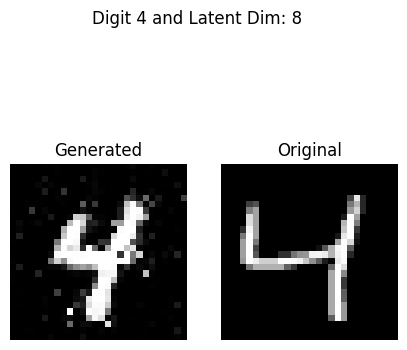

1/1 [==============================] - 0s 64ms/step


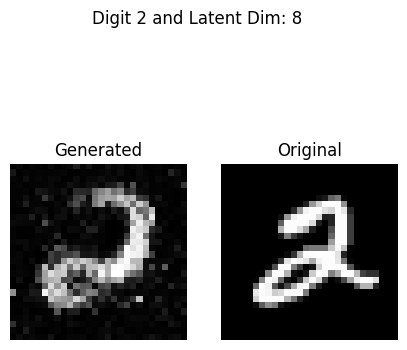

1/1 [==============================] - 0s 68ms/step


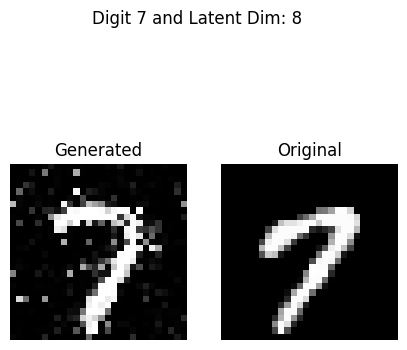

1/1 [==============================] - 0s 67ms/step


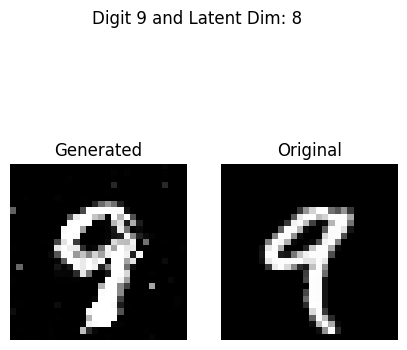

1/1 [==============================] - 0s 77ms/step


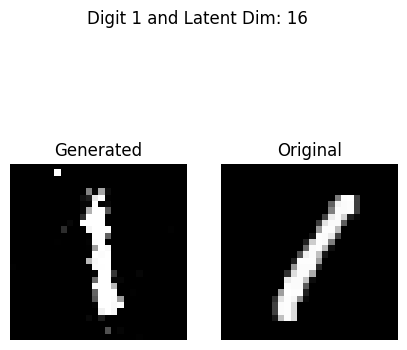

1/1 [==============================] - 0s 61ms/step


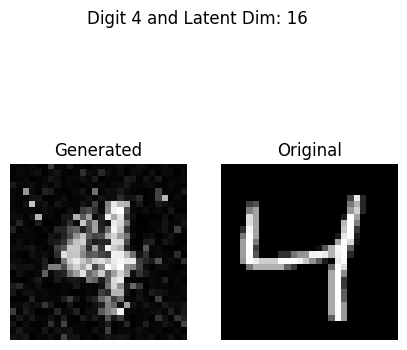

1/1 [==============================] - 0s 58ms/step


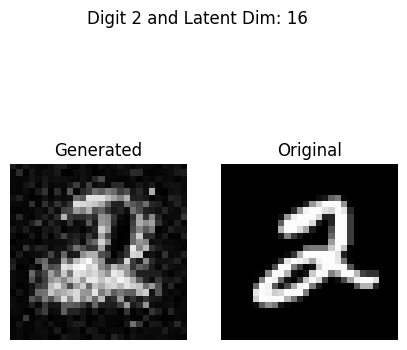

1/1 [==============================] - 0s 58ms/step


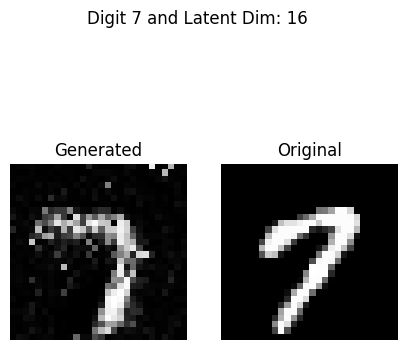

1/1 [==============================] - 0s 57ms/step


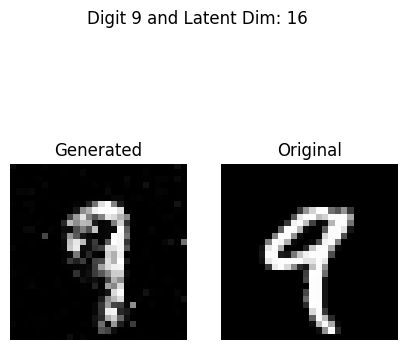

1/1 [==============================] - 0s 76ms/step


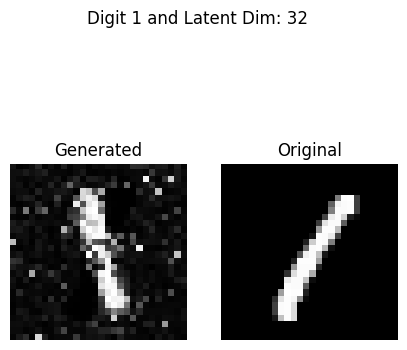

1/1 [==============================] - 0s 60ms/step


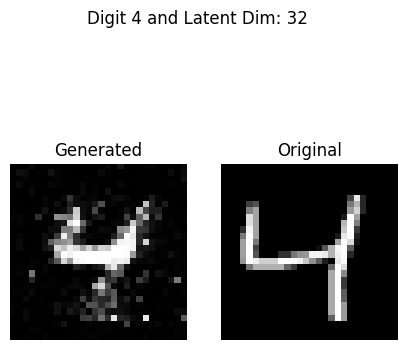

1/1 [==============================] - 0s 55ms/step


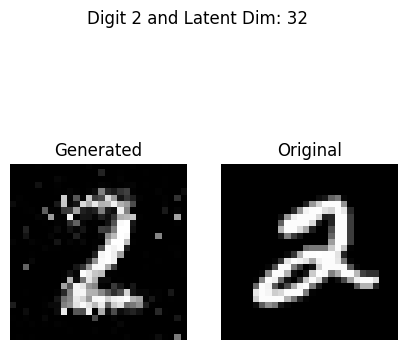

1/1 [==============================] - 0s 103ms/step


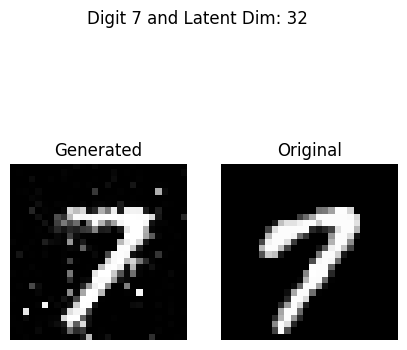

1/1 [==============================] - 0s 66ms/step


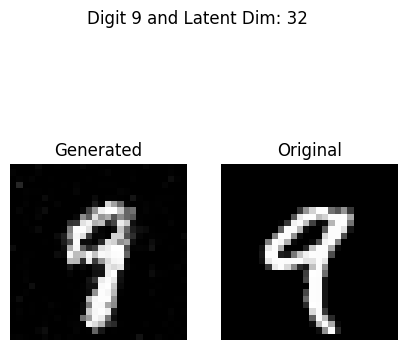

1/1 [==============================] - 0s 60ms/step


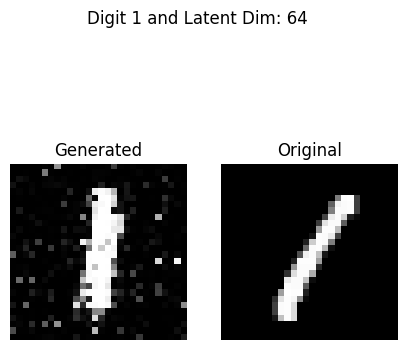

1/1 [==============================] - 0s 80ms/step


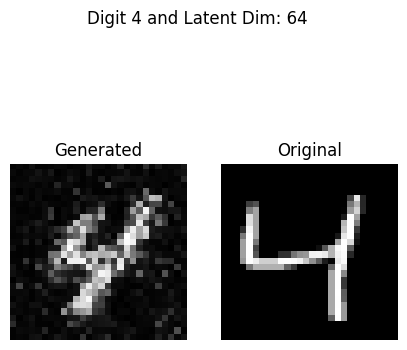

1/1 [==============================] - 0s 58ms/step


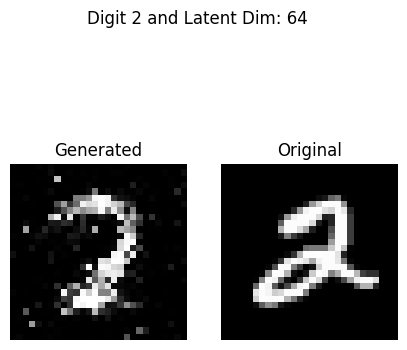

1/1 [==============================] - 0s 66ms/step


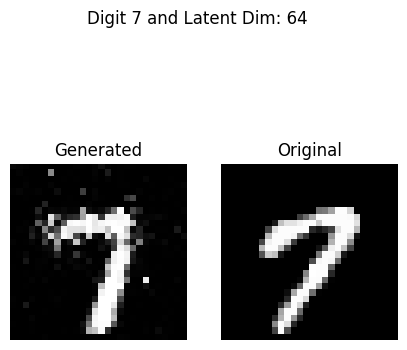

1/1 [==============================] - 0s 66ms/step


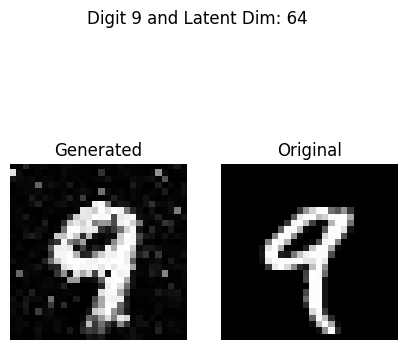

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(x_train, y_train), (_, _) = mnist.load_data()
x_train = x_train.astype("float32") / 127.5 - 1
x_train = np.expand_dims(x_train, axis=-1)

# Filter dataset for specific digits
digits = [1, 4, 2, 7, 9]
filtered_indices = np.isin(y_train, digits)
x_train_filtered = x_train[filtered_indices]
y_train_filtered = y_train[filtered_indices]

# Define the generator model
def build_generator(latent_dim):
    model = keras.Sequential([
        layers.Dense(128, input_dim=latent_dim),
        layers.LeakyReLU(alpha=0.2),
        layers.Dense(256),
        layers.LeakyReLU(alpha=0.2),
        layers.Dense(512),
        layers.LeakyReLU(alpha=0.2),
        layers.Dense(784, activation="tanh"),
        layers.Reshape((28, 28, 1))
    ])
    return model

# Define the discriminator model
def build_discriminator():
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28, 1)),
        layers.Dense(512),
        layers.LeakyReLU(alpha=0.2),
        layers.Dense(256),
        layers.LeakyReLU(alpha=0.2),
        layers.Dense(128),
        layers.LeakyReLU(alpha=0.2),
        layers.Dense(1, activation="sigmoid")
    ])
    return model

def train_gan_for_digit(digit, latent_dim):
    # Filter dataset for the specific digit
    digit_indices = np.where(y_train_filtered == digit)[0]
    x_train_digit = x_train_filtered[digit_indices]

    # Build and compile the discriminator
    discriminator = build_discriminator()
    discriminator.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(lr=0.0002, beta_1=0.5))

    # Build the generator
    generator = build_generator(latent_dim)

    # Build and compile the combined GAN model
    discriminator.trainable = False
    gan_input = keras.Input(shape=(latent_dim,))
    gan_output = discriminator(generator(gan_input))
    gan = keras.Model(gan_input, gan_output)
    gan.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(lr=0.0002, beta_1=0.5))

    # Training loop
    epochs = 10  # Reduced for testing
    batch_size = 128
    steps_per_epoch = x_train_digit.shape[0] // batch_size

    for epoch in range(epochs):
        for step in range(steps_per_epoch):
            # Sample random points in the latent space
            random_latent_vectors = np.random.normal(size=(batch_size, latent_dim))

            # Decode them to fake images
            generated_images = generator.predict(random_latent_vectors)

            # Combine them with real images
            real_images = x_train_digit[np.random.randint(0, x_train_digit.shape[0], batch_size)]
            combined_images = np.concatenate([generated_images, real_images])

            # Assemble labels discriminating real from fake images
            labels = np.concatenate([np.ones((batch_size, 1)), np.zeros((batch_size, 1))])
            # Add random noise to the labels - important trick!
            labels += 0.05 * np.random.random(labels.shape)

            # Train the discriminator
            discriminator.train_on_batch(combined_images, labels)

            # Sample random points in the latent space
            random_latent_vectors = np.random.normal(size=(batch_size, latent_dim))

            # Assemble labels that say "all real images"
            misleading_targets = np.zeros((batch_size, 1))

            # Train the generator (via the GAN model, where the discriminator weights are frozen)
            gan.train_on_batch(random_latent_vectors, misleading_targets)

    # Generate some images after all epochs are completed
    random_latent_vectors = np.random.normal(size=(1, latent_dim))
    generated_images = generator.predict(random_latent_vectors)[0]

    # Plot the generated images side by side with original dataset images
    plt.figure(figsize=(5, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(generated_images.reshape(28, 28), cmap='gray')
    plt.title("Generated")
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(x_train_digit[0, :, :, 0], cmap='gray')
    plt.title("Original")
    plt.axis('off')
    plt.suptitle(f"Digit {digit} and Latent Dim: {latent_dim}")
    plt.show()

# Train GANs for each digit and latent variable dimension
latent_dims = [2, 4, 8, 16, 32, 64]
for latent_dim in latent_dims:
    for digit in digits:
        train_gan_for_digit(digit, latent_dim)
